In [1]:
from PIL import Image
import PIL
import numpy as np

In [2]:
X = []
y = []


In [3]:
class_dict = {
    0 : "noise",
    1 : "one_finger",
    2 : "two_fingers",
    3 : "three_fingers",
    4 : "four_fingers",
    5 : "five_fingers",
    6 : "fist",
    7 : "thumbs_up",
    8 : "thumbs_down",
    9 : "okay",
    10: "c_hand"
}

In [4]:
for i in range(1000):
  for j in range(11):
    X.append(np.array(Image.open("data/images/" + str(j) + "/" + class_dict[j] + str(i) + ".png").resize((125,125), PIL.Image.ANTIALIAS)))
    y.append(j)
 

In [5]:
X = np.array(X)
y = np.array(y)

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X[180])

In [7]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (8800, 125, 125)
8800 train samples
2200 test samples


In [9]:
num_classes = 11
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [10]:
X_test.shape[0]

2200

In [11]:
img_rows, img_cols = 125, 125

X_train = X_train.reshape((X_train.shape[0], 125, 125, 1))
X_test = X_test.reshape((X_test.shape[0], 125, 125, 1))


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(125, 125, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)

Train on 8800 samples, validate on 2200 samples
Epoch 1/20
8800/8800 [==============================] - 9s 984us/sample - loss: 1.1455 - accuracy: 0.6190 - val_loss: 0.3866 - val_accuracy: 0.8868
Epoch 2/20
8800/8800 [==============================] - 6s 677us/sample - loss: 0.4256 - accuracy: 0.8657 - val_loss: 0.2322 - val_accuracy: 0.9286
Epoch 3/20
8800/8800 [==============================] - 6s 678us/sample - loss: 0.2740 - accuracy: 0.9165 - val_loss: 0.2068 - val_accuracy: 0.9368
Epoch 4/20
8800/8800 [==============================] - 6s 677us/sample - loss: 0.2272 - accuracy: 0.9314 - val_loss: 0.1334 - val_accuracy: 0.9673
Epoch 5/20
8800/8800 [==============================] - 6s 677us/sample - loss: 0.1809 - accuracy: 0.9464 - val_loss: 0.1313 - val_accuracy: 0.9659
Epoch 6/20
8800/8800 [==============================] - 6s 678us/sample - loss: 0.1552 - accuracy: 0.9553 - val_loss: 0.1313 - val_accuracy: 0.9645
Epoch 7/20
8800/8800 [==============================] - 6s 676us

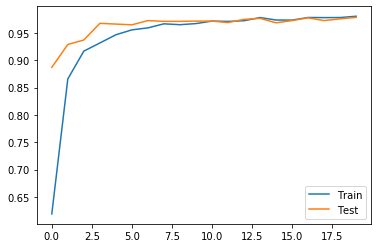

In [14]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()

In [15]:
model.save_weights('GestureModel.h5')